Лабораторная работа 1. Звуки и сигналы

Зарубина Анна, 5130901/10101

Упраженение 1.2

In [74]:
from __future__ import print_function, division
%matplotlib inline
import thinkdsp
import thinkplot
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

Скачаем с сайта образец звука и исследуем его различными способами. При исследовании будем использовать библиотеку thinkdsp. Для начала представим исследуемый образец в виде волны (wave).

In [76]:
wave = thinkdsp.read_wave('724392__ikbenraar__woman_screaming.WAV')
wave.make_audio()

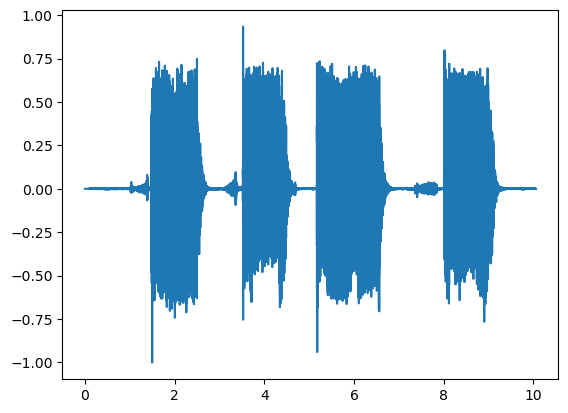

In [77]:
wave.plot()

Выделим промежуток длительностью 0.2 секунды и будем его исследовать.

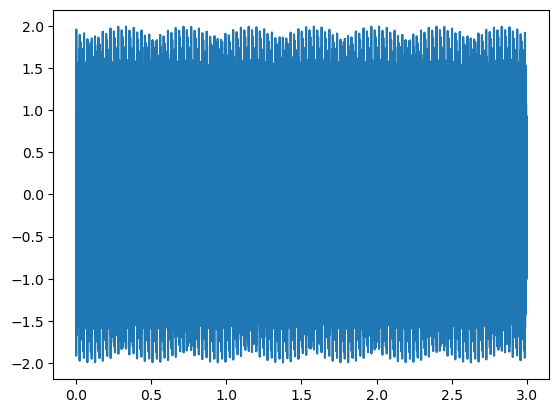

In [72]:
wave.plot()

In [51]:
wave = wave.segment(start = 0.1, duration = 0.3)
wave.make_audio()

Получим спектр выбранного фрагмента.

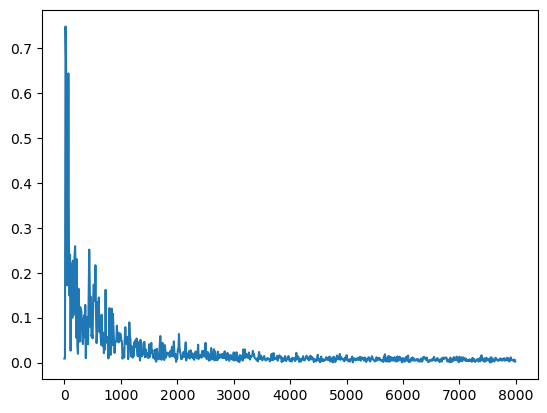

In [53]:
 spectr = wave.make_spectrum()
spectr.plot(8000)


Отбросим высокие частоты (более 5000 Гц) и послушаем, что получилось.

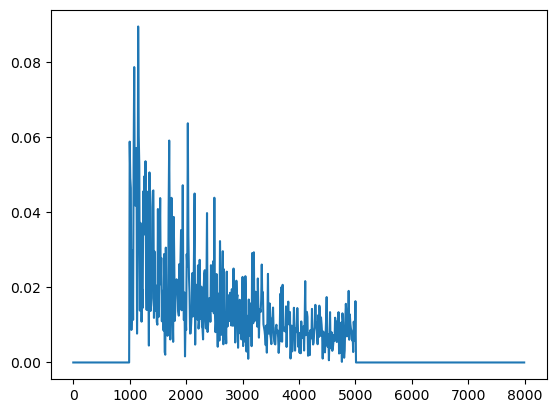

In [55]:
 spectr2 = wave.make_spectrum()
spectr2.low_pass(5000)
spectr2.high_pass(1000)
spectr2.plot(8000)

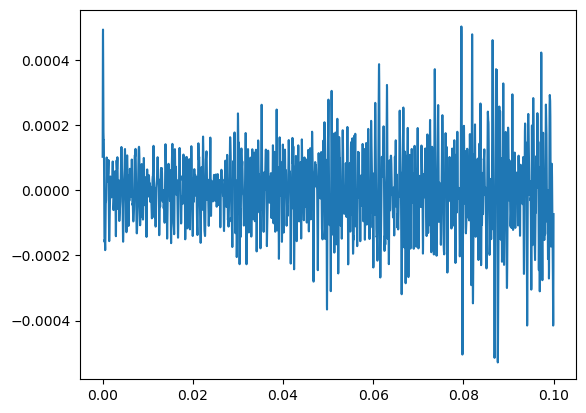

In [56]:
filtered = spectr2.make_wave()
filtered.plot()
filtered.make_audio()

Упражнение 1.3

Создадим обьекты SinSignal и CosSignal, просуммируем их. Получим сложный сигнал.

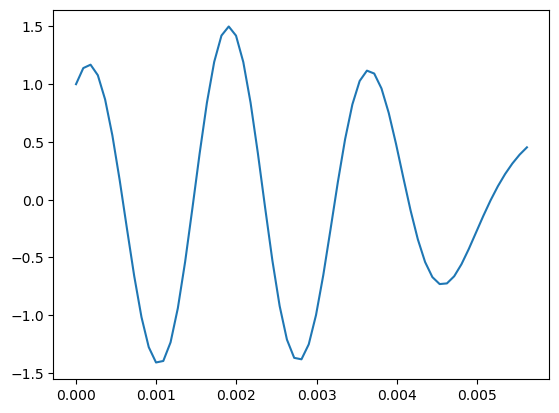

In [59]:
 cos_sig_1 = thinkdsp.CosSignal(freq=523.25, amp=1.0, offset=0)
sin_sig_2 = thinkdsp.SinSignal(freq=659.26, amp=0.5, offset=0)
mix = cos_sig_1 + sin_sig_2
mix.plot()


In [60]:
 wave = mix.make_wave(duration=2, start=0, framerate=31025)
wave.make_audio()


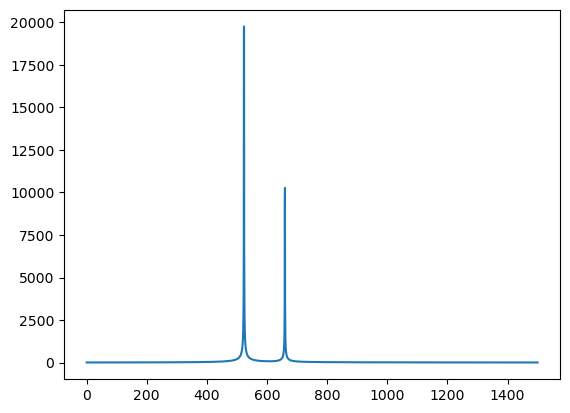

In [61]:
spectrum = wave.make_spectrum()
spectrum.plot(1500)


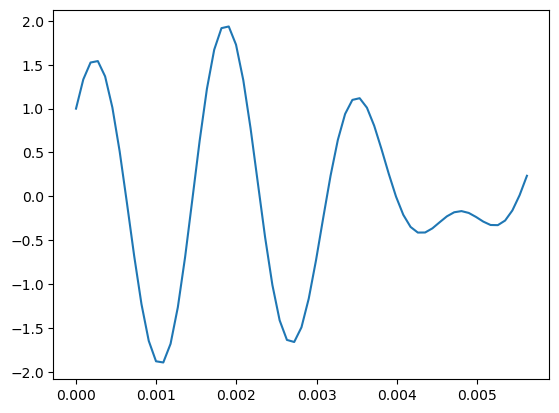

In [62]:
 sin_sig_3 = thinkdsp.SinSignal(freq=698.46, amp=0.5, offset=0)
mix += sin_sig_3
mix.plot()


In [63]:
 wave = mix.make_wave(duration=3, start=0, framerate=31025)
wave.make_audio()


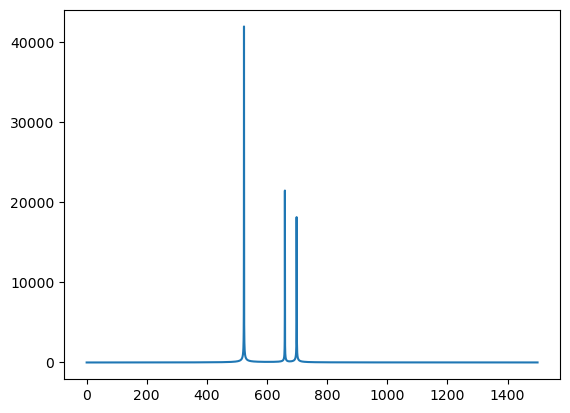

In [64]:
 spectrum = wave.make_spectrum()
spectrum.plot(1500)


Упражнение 1.4

Напишем функцию stretch, ускоряющую или замедляющую сигнал.

In [67]:
def stretch_wave(w, coef):
    w.ts *= coef
    w.framerate /= coef
    w.plot()
    spectrum = w.make_spectrum()
    audio = spectrum.make_wave().make_audio()

Протестируем её. Длительность аудиозаписи увеличится в два раза за счёт увеличения массива ts моментов выборки и преобразования сигнала. Запись замедляется за счёт уменьшения частоты фреймов.

In [70]:
w = thinkdsp.read_wave('724392__ikbenraar__woman_screaming.WAV')
interact(stretch_wave, w=fixed(w), coef=(0.4, 2, 0.2))


interactive(children=(FloatSlider(value=1.2000000000000002, description='coef', max=2.0, min=0.4, step=0.2), O…

<function __main__.stretch_wave(w, coef)>